In [242]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [34]:
data = pd.read_csv('hw_25000.csv',names=['index','height_inches','weight_pounds'],delimiter=';',skiprows=2)
data.head(5)

,index,height_inches,weight_pounds
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [119]:
data['height'] = data['height_inches'] * 2.54
data['weight'] = data['weight_pounds']*0.453592
data.columns

Index(['index', 'height_inches', 'weight_pounds', 'height', 'weight'], dtype='object')

In [60]:
mean = np.mean(data['weight'])
std_deviation = np.std(data['weight'])

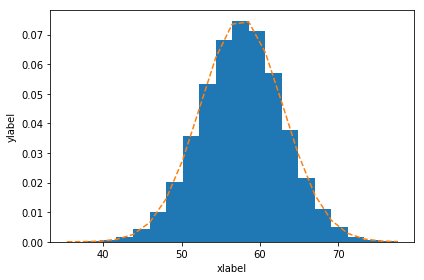

In [290]:
mu = np.mean(data['weight'])  # mean of distribution
sigma = np.std(data['weight'])  # standard deviation of distribution
fig, ax = plt.subplots()
n, bins, patches = ax.hist( data['weight'], bins = 20, normed=1 )
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins,y,'--')
ax.set_xlabel("xlabel")
ax.set_ylabel("ylabel")
fig.tight_layout()
plt.show()

In [245]:
data['height'].size

25000

In [247]:
from pylab import rcParams
%pylab inline

Populating the interactive namespace from numpy and matplotlib


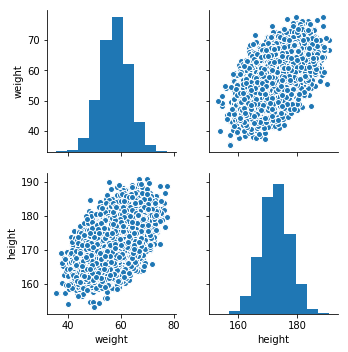

In [248]:
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(data[['weight','height']])
sns_plot.savefig('weith_height.png')

In [233]:
data['height'].mean()

172.70250853587314

In [306]:
data_len = data['height'].size
height_170_180 = pd.DataFrame(columns = data.columns);

t = np.random.randint(data_len)
list(data.values[t])
tdf = pd.DataFrame([list(data.values[t])], columns = data.columns) 
height_170_180 = height_170_180.append(tdf)
height_170_180.head()

,index,height_inches,weight_pounds,height,weight
0,9727.0,71.15411,151.4754,180.731439,68.70803


In [311]:
height_170_180 = None
temp_list = []
data_len = data['height'].size
while 1 :
    t = np.random.randint(data_len)
    h = data['height'][t]
    if h > 170 and h < 180:
        temp_list.append(list(data.values[t])) 
        if len(temp_list) == 20:
            break
height_170_180 = pd.DataFrame(temp_list, columns = data.columns);
height_170_180.reset_index(inplace=True)
height_170_180.head()

,level_0,index,height_inches,weight_pounds,height,weight
0,0,3346.0,67.56202,115.1545,171.607531,52.233160
1,1,17865.0,69.13139,133.5610,175.593731,60.582201
2,2,9171.0,68.53352,124.2808,174.075141,56.372777
3,3,22960.0,68.52141,113.6681,174.044381,51.558941
4,4,13165.0,67.76647,107.9410,172.126834,48.961174


In [312]:
sample = height_170_180.weight.tolist()
stats.ttest_1samp( sample, data['weight'].mean())

Ttest_1sampResult(statistic=0.20822084252778314, pvalue=0.83727233605951668)

Уровень значимости  pvalue=0.83, следовательно отклонения в весе в выбрке из 20 человек с ростом от 170см. до 180см. являются статистически не значимы.